In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [3]:
#for rules
from skfuzzy import control as ctrl

In [50]:
#fi
fi_norm = np.arange(-90,270,0.01,dtype = np.float)
fi = ctrl.Antecedent(np.arange(-90,270,0.01,dtype = np.float), 'fi')

In [51]:
fi_norm

array([-90.  , -89.99, -89.98, ..., 269.97, 269.98, 269.99])

In [52]:
a,c = -115,-15
b = (a+c)/2
fi_s3 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_s3'] = fi_s3

a,c = -45,45
b = (a+c)/2
fi_s2 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_s2'] = fi_s2

a,c = 15,90
b = (a+c)/2
fi_s1 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_s1'] = fi_s1

a,c = 80,100
b = (a+c)/2
fi_ce = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_ce'] = fi_ce

a,c = 90,165
b = (a+c)/2
fi_b1 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_b1'] = fi_b1

a,c = 135,225
b = (a+c)/2
fi_b2 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_b2'] = fi_b2

a,c = 195,295
b = (a+c)/2
fi_b3 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_b3'] = fi_b3

In [63]:
#find amount of sth
fi_b2[int((200 -(-90))/0.01)]

0.5555555555522587

E:\anaconda\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
E:\anaconda\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


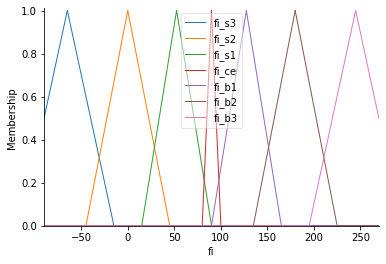

In [64]:
fi.view()

In [65]:
#x
x_norm = np.arange(0,20,0.01,dtype = np.float)
x = ctrl.Antecedent(np.arange(0,20,0.01,dtype = np.float), 'x')

In [66]:
a,b,c,d = 0,0,1.5,7
x_s2 = fuzz.trapmf(x_norm,[a,b,c,d])
x['x_s2'] = x_s2

x_s1 = fuzz.trimf(x_norm,[4,7,10])
x['x_s1'] = x_s1

x_ce = fuzz.trimf(x_norm,[9,10,11])
x['x_ce'] = x_ce

x_b1 = fuzz.trimf(x_norm,[10,13,16])
x['x_b1']= x_b1

a,b,c,d = 13,18.5,20,20
x_b2 = fuzz.trapmf(x_norm,[a,b,c,d])
x['x_b2'] = x_b2

E:\anaconda\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


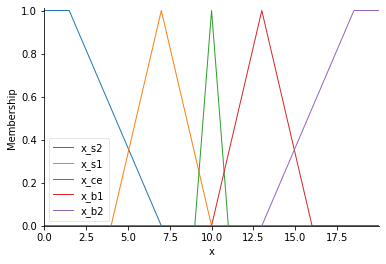

In [85]:
x.view()

In [67]:
#theta
theta_norm = np.arange(-40,40,0.01,dtype = np.float)
theta = ctrl.Consequent(np.arange(-40,40,0.01,dtype = np.float), 'theta')

In [71]:
theta_s3 = fuzz.trimf(theta_norm,[-40,-40,-20])
theta['theta_s3'] = theta_s3

theta_s2 = fuzz.trimf(theta_norm,[-33,-20,-7])
theta['theta_s2'] = theta_s2

theta_s1 = fuzz.trimf(theta_norm,[-14,-7,0])
theta['theta_s1'] = theta_s1

theta_ce = fuzz.trimf(theta_norm,[-4,0,4])
theta['theta_ce'] = theta_ce

theta_b1 = fuzz.trimf(theta_norm,[0,7,14])
theta['theta_b1'] = theta_b1

theta_b2 = fuzz.trimf(theta_norm,[7,20,33])
theta['theta_b2'] = theta_b2

theta_b3 = fuzz.trimf(theta_norm,[20,40,40])
theta['theta_b3'] = theta_b3

In [72]:
theta_b3[int((30-(-40))/0.01)]

0.49999999999930367

E:\anaconda\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


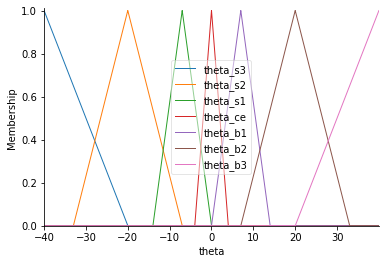

In [73]:
theta.view()

In [151]:
rules = []

In [152]:
#rules
#table 1
#x1 = 1
#fi1 = 0
#theta1 = -19
def calculate_rule(x1,fi1,theta1):
    dic_theta = {1:theta_s3,2:theta_s2,3:theta_s1,4:theta_ce,5:theta_b1,6:theta_b2,7:theta_b3}
    dic_theta_names = {1:'theta_s3',2:'theta_s2',3:'theta_s1',4:'theta_ce',5:'theta_b1',6:'theta_b2',7:'theta_b3'}

    max_theta_member = np.argmax([dic_theta[i][int((theta1-(-40))/0.01)] for i in range(1,8)])

    dic_x = {1:x_s2,2:x_s1,3:x_ce,4:x_b1,5:x_b2}
    dic_x_names = {1:'x_s2',2:'x_s1',3:'x_ce',4:'x_b1',5:'x_b2'}

    max_x = np.argmax([dic_x[i][int(x1*100)] for i in range(1,6)])

    dic_fi = {1:fi_s3,2:fi_s2,3:fi_s1,4:fi_ce,5:fi_b1,6:fi_b2,7:fi_b3}
    dic_fi_names = {1:'fi_s3',2:'fi_s2',3:'fi_s1',4:'fi_ce',5:'fi_b1',6:'fi_b2',7:'fi_b3'}

    max_fi_member = np.argmax([dic_fi[i][int((fi1-(-90))/0.01)] for i in range(1,8)])

    rules.append(ctrl.Rule(fi[dic_fi_names[max_fi_member+1]] & x[dic_x_names[max_x+1]],theta[dic_theta_names[max_theta_member+1]]))




In [153]:
import math


In [157]:
#table 1
rules = []
t = 17
fi1 = 0
theta1 = -19
x1= 1
thetas=[-19,-17.95,-16.9,-15.85,-14.8,-13.75,-12.7,-11.65,-10.6,-9.55,-8.5,-7.45,-6.4,-5.34,-4.3,-3.25,-2.2,0]
calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    x1 = round(x1 + math.cos(math.radians(fi1)+math.radians(thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
rules    

[IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_s1]
 	AND aggregation functio

In [158]:
#table 2
t = 19
x1= 1
fi1 = 90
theta1 = 18

thetas=[18,16,14,12,10,8,6,4,2,0,-2,-4,-6,-8,-10,-12,-14,-16,-18,0]
calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1)+math.radians(thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
rules    

[IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_s1]
 	AND aggregation functio

In [159]:
len(rules)

38